<a href="https://colab.research.google.com/github/sfomel/ipython/blob/master/MadagascarColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Madagascar in Google Colab

1. Download the binary distribution

In [8]:
!wget https://ahay.org/data/madagascar.tar.gz

--2025-10-11 14:37:23--  https://ahay.org/data/madagascar.tar.gz
Resolving ahay.org (ahay.org)... 147.79.120.169, 92.112.198.22, 2a02:4780:50:2a17:e906:c8c4:3d6a:ceb3, ...
Connecting to ahay.org (ahay.org)|147.79.120.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135311366 (129M) [application/gzip]
Saving to: ‘madagascar.tar.gz.1’

madagascar.tar.gz.1 100%[===================>] 129.04M  52.4MB/s    in 2.5s    

2025-10-11 14:37:26 (52.4 MB/s) - ‘madagascar.tar.gz.1’ saved [135311366/135311366]



2. Unpack

In [9]:
!tar xzf madagascar.tar.gz -C /

3. Set environmental variables

In [11]:
%env RSFROOT=/content/RSFROOT
%env PYTHONPATH=/content/RSFROOT/lib/python3.12/site-packages
%env LD_LIBRARY_PATH=/content/RSFROOT/lib
%env DATAPATH=/content/RSFROOT/data/
%env PATH=/content/RSFROOT/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin

env: RSFROOT=/content/RSFROOT
env: PYTHONPATH=/content/RSFROOT/lib/python3.12/site-packages
env: LD_LIBRARY_PATH=/content/RSFROOT/lib
env: DATAPATH=/content/RSFROOT/data/
env: PATH=/content/RSFROOT/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


4. Make sure that the Python interface is accessible.

In [12]:
import sys
sys.path.append('/content/RSFROOT/lib/python3.12/site-packages')

5. Load Python interface to Madagascar

In [13]:
from m8r import view

## Examples using SCons

In [14]:
%%file test.scons

Flow('welcome',None,
     'spike n1=1000 k1=300 | bandpass fhi=2 phase=1')

Result('welcome','graph title="Welcome to Madagascar" ')

Writing test.scons


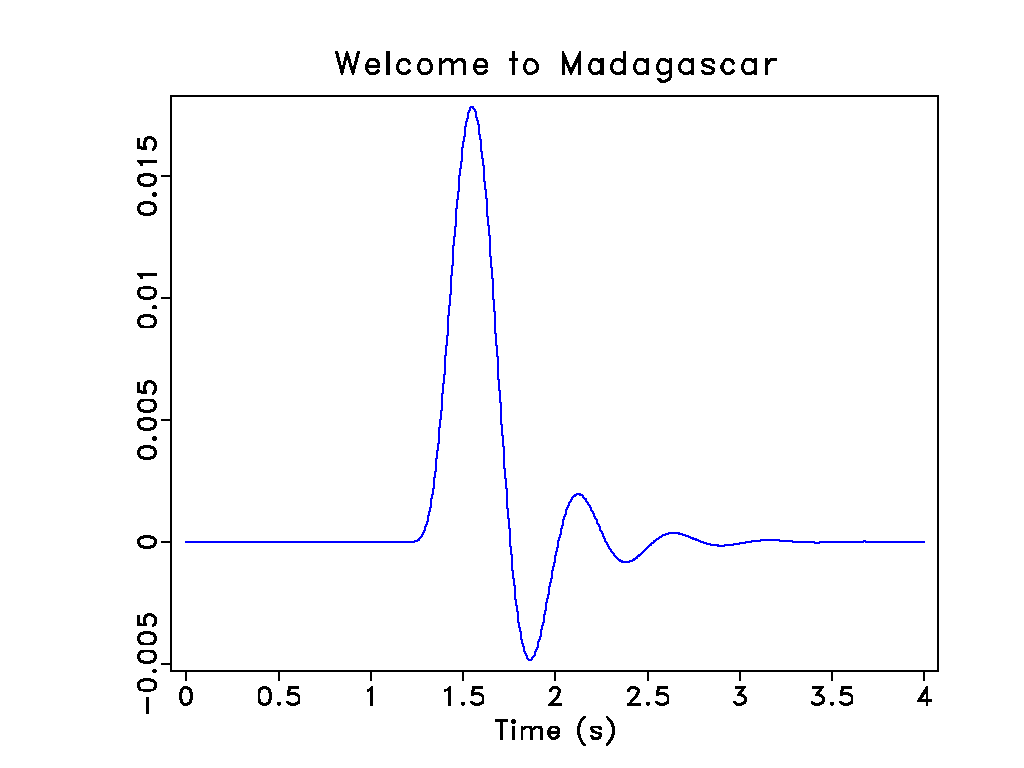

In [15]:
view('welcome')

### SCons + Matplotlib

In [16]:
%%file test2.scons

Result('welcome2','welcome',
       '''
       matplotlib plot title="Welcome to Madagascar"
       xlabel="Time (s)" ylabel=Amplitude
       grid=y linewidth=3
       ''')

Writing test2.scons


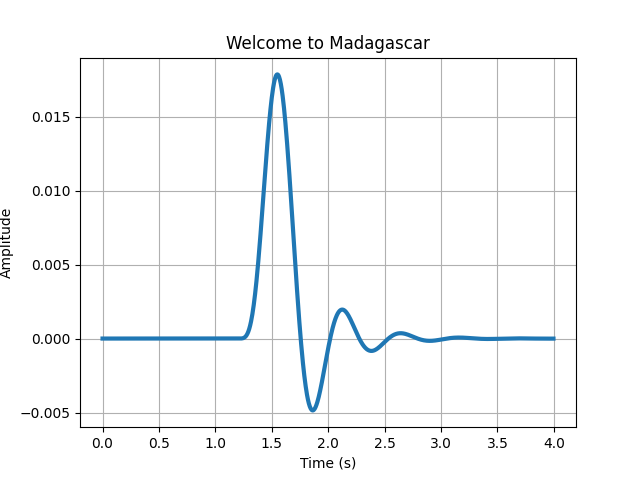

In [17]:
view('welcome2')

## Madagascar interface with NumPy

Madagascar programs can work on NumPy objects.

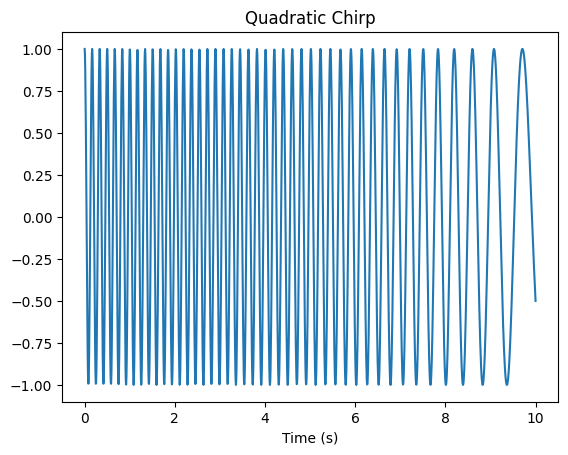

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

t = np.linspace(0, 10, 1500)
c = chirp(t, f0=6, f1=1, t1=10, method='quadratic')

plt.plot(t, c)
plt.title('Quadratic Chirp')
plt.xlabel('Time (s)')
plt.show()

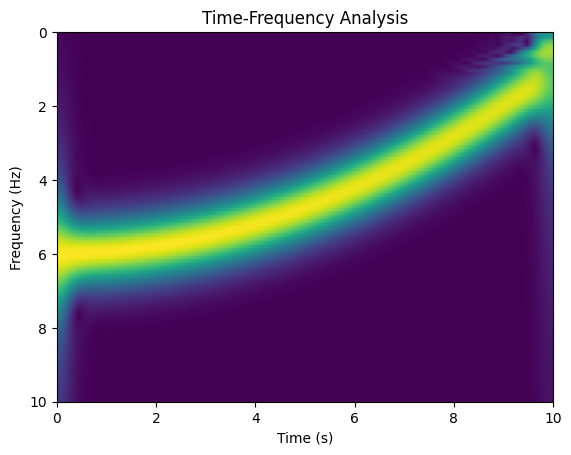

In [19]:
import m8r

transform = m8r.put(o1=0,d1=t[1]).timefreq(rect=50,dw=0.1,nw=101)
tf = transform.apply(c)

plt.imshow(tf,extent=[0,10,10,0],aspect='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Time-Frequency Analysis')
plt.show()

Alternatively, convert between NumPy and RSF file objects.

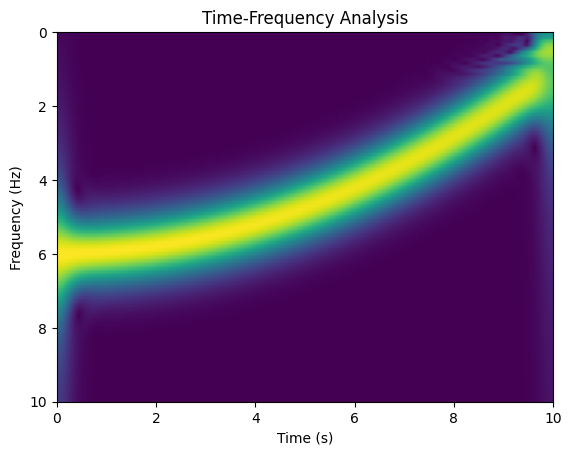

In [20]:
chirp = m8r.Output('chirp.rsf')
chirp.put('n1',len(c))
chirp.put('o1',0)
chirp.put('d1',t[1])
chirp.write(c)
chirp.close()

transform = m8r.timefreq(rect=50,dw=0.1,nw=101)
tf = transform.apply(chirp)

plt.imshow(tf[:],extent=[0,10,10,0],aspect='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Time-Frequency Analysis')
plt.show()

## Creating a Madagascar distribution for Google Colab

To create a Madagascar distribution loaded in the beginning, use the following steps:

```bash
!git clone https://github.com/ahay/src ~/RSFSRC
!apt-get install libgd-dev
!cd ~/RSFSRC && sh ./configure --prefix=/content/RSFROOT
!cd ~/RSFSRC && make install
!tar czf madagascar.tar.gz /content/RSFROOT
```

To use a stable distribution, replace the first line with

```bash
!wget https://downloads.sourceforge.net/project/rsf/madagascar/madagascar-4.2/madagascar-4.2.tar.gz
!tar xzf madagascar-4.2.tar.gz
!ln -s madagascar-4.2 ~/RSFSRC
```